Decision tree regression is a machine learning method used for predictive modeling. It works by splitting the data into subsets based on feature values, and this process is repeated recursively, creating a tree-like structure. Each leaf node of the tree represents a predicted value for the target variable.

Let's go through the detailed mathematical calculations behind decision tree regression using a small example related to the public sector.

### Example: Predicting Public Sector Employee Salaries

Suppose we have a small dataset with the following features:

1. **Years of Experience**
2. **Education Level** (1: Bachelor's, 2: Master's, 3: Ph.D.)

And the target variable is the **Annual Salary**.

#### Dataset:

| Employee | Years of Experience | Education Level | Annual Salary ($) |
|----------|---------------------|-----------------|-------------------|
| A        | 2                   | 1               | 40,000            |
| B        | 5                   | 1               | 50,000            |
| C        | 7                   | 2               | 80,000            |
| D        | 10                  | 3               | 120,000           |
| E        | 3                   | 2               | 45,000            |

### Step-by-Step Construction of the Decision Tree

1. **Determine the Best Split:**

   - Calculate the mean salary for the entire dataset:
     
     Mean Salary = 40,000 + 50,000 + 80,000 + 120,000 + 45,000/5 = 67,000
     

   - Compute the initial variance (squared deviation from the mean):
     
     Initial Variance = (40,000 - 67,000)^2 + (50,000 - 67,000)^2 + (80,000 - 67,000)^2 + (120,000 - 67,000)^2 + (45,000 - 67,000)^2 / 5
     
     
     Initial Variance = (729,000,000) + (289,000,000) + (169,000,000) + (2,809,000,000) + (484,000,000) / 5 = 4,480,000,000 / 5 = 896,000,000
     

2. **Evaluate Splits:**

   Let's evaluate splits based on "Years of Experience" and "Education Level".

   - **Split on "Years of Experience":**

     Possible splits: (x = 2.5, 3.5, 6, 8.5)

     For (x = 6):
     - Group 1: A, B, E (<= 6 years)
     - Group 2: C, D (> 6 years)

     Mean Salaries:
     - Group 1: (40,000 + 50,000 + 45,000 / 3 = 45,000)
     - Group 2: (80,000 + 120,000 / 2 = 100,000)

     Variance for Group 1:
     
     Variance = (40,000 - 45,000)^2 + (50,000 - 45,000)^2 + (45,000 - 45,000)^2 / 3 = 25,000,000 + 25,000,000 + 0 / 3 = 16,666,667
     

     Variance for Group 2:
     
     Variance = (80,000 - 100,000)^2 + (120,000 - 100,000)^2 / 2 = 400,000,000 + 400,000,000 / 2 = 400,000,000
     

     Weighted Variance:
     
     Weighted Variance = 3 / 5 (16,666,667) + 2 / 5 (400,000,000) = 10,000,000 + 160,000,000 = 170,000,000
     

   - **Split on "Education Level":**

     Possible splits: (x = 1.5, 2.5)

     For (x = 1.5):
     - Group 1: A, B (<= 1.5)
     - Group 2: C, D, E (> 1.5)

     Mean Salaries:
     - Group 1: (40,000 + 50,0002 = 45,000)
     - Group 2: (80,000 + 120,000 + 45,0003 = 81,667)

     Variance for Group 1:
     
     Variance = (40,000 - 45,000)^2 + (50,000 - 45,000)^2 / 2 = 25,000,000 + 25,000,0002 = 25,000,000
     

     Variance for Group 2:
     
     Variance = (80,000 - 81,667)^2 + (120,000 - 81,667)^2 + (45,000 - 81,667)^2 / 3 = 2,778,889 + 1,476,111,111 + 1,361,111,1113 = 946,666,667
     

     Weighted Variance:
     
     Weighted Variance = 2 / 5 (25,000,000) + 3 / 5 (946,666,667) = 10,000,000 + 568,000,000 = 578,000,000
     

### Best Split Selection

Comparing the weighted variances, the split on "Years of Experience" at (x = 6) results in a lower weighted variance (170,000,000) compared to the split on "Education Level" (578,000,000). Thus, the best split is "Years of Experience" at (x = 6).

### Recursive Splitting

Repeat the process for each subset (Group 1 and Group 2) until a stopping criterion is met (e.g., minimum node size or no further variance reduction). This process creates a tree with nodes representing decision rules and leaf nodes representing predicted salary values.

### Prediction

To predict the salary of a new employee with 4 years of experience and a Master's degree:
1. Start at the root node.
2. Follow the decision rules based on the new employee's features.
3. Reach a leaf node and use the mean salary of that leaf node as the prediction.

In our example, for an employee with 4 years of experience (Group 1 in the first split), the predicted salary would be the mean of Group 1:

Predicted Salary = 45,000


### Conclusion

The mathematical calculations behind decision tree regression involve determining the best splits based on minimizing the weighted variance. This is done by evaluating all possible splits and recursively applying this process to create a tree structure that can predict target values.

To implement a simple decision tree regression model using Python. We'll use the `DecisionTreeRegressor` from the `sklearn` library for simplicity. We'll also manually demonstrate the splitting process to help understand how the decision tree makes decisions.

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Creating the dataset
data = {
    'Years of Experience': [2, 5, 7, 10, 3],
    'Education Level': [1, 1, 2, 3, 2],
    'Annual Salary': [40000, 50000, 80000, 120000, 45000]
}

df = pd.DataFrame(data)

In [7]:
# Defining features (X) and target (y)
X = df[['Years of Experience', 'Education Level']]
y = df['Annual Salary']

# Creating and training the decision tree regressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X, y)

DecisionTreeRegressor(random_state=0)

Now let's predict the salary of a new employee with 4 years of experience and a Master's degree (Education Level = 2):

In [8]:
# New employee data
new_employee = [[18, 2]]

# Predicting the salary
predicted_salary = model.predict(new_employee)
print(f'Predicted Salary: ${predicted_salary[0]:,.2f}')

Predicted Salary: $120,000.00


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


To help understand the decision-making process of the decision tree, let's visualize the tree using the `plot_tree` function from `sklearn.tree`:

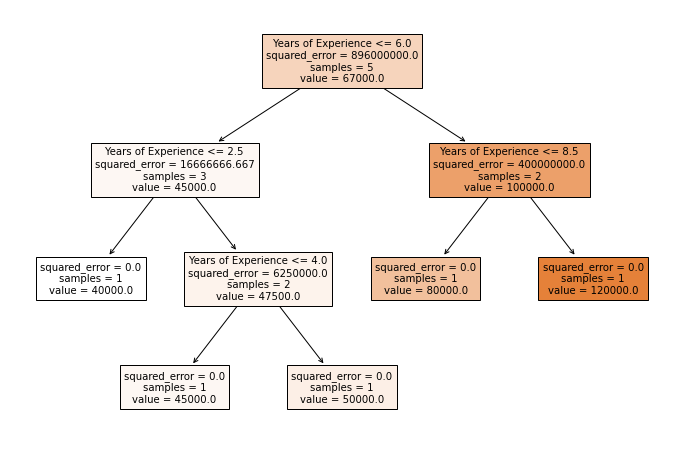

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Years of Experience', 'Education Level'], filled=True)
plt.show()